# Basic Setup

In [1]:
import os
os.chdir('/Users/qianzhiyuan/GRPO/tiny_flow_matching')

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Inference

In [ ]:
from IPython.display import clear_output, display

def show_movement(x_t: torch.Tensor,): # [B, 2]

    plt.figure(figsize=(4, 4), facecolor='None')
    x_cpu = x_t.detach().cpu().numpy()
    plt.hist2d(x_cpu[:, 0], x_cpu[:, 1], bins=300, cmap="viridis", density=True)
    plt.gca().set_aspect("equal", "box")
    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    display(plt.gcf())
    plt.close()
    clear_output(wait=True)

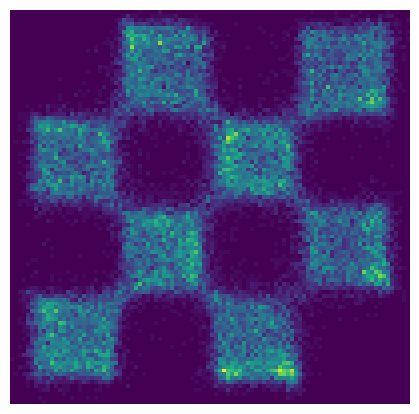

In [25]:
from model.mlp import MLP

# Inference Parameters
batch_size = 50000
steps = 200
hidden_dim = 128

# Load Pretrained Model
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
ckp_path = './checkpoints/flow_matching_mlp.pt'

model = MLP(hidden_dim=hidden_dim).to(device)
model.load_state_dict(torch.load(ckp_path, map_location=device))
model.eval()

# Input distribution: 2D Gaussian
x = torch.randn(batch_size, 2).to(device)
dt = 1.0 / steps

for i in range(steps):
    t_val = float(i) / steps
    t = torch.full((batch_size, 1), t_val).to(device)

    with torch.no_grad():
        v = model(x, t)
        x = x + v * dt

    show_movement(x)